## Data Cleaning
* Tokenization
    > Split text into tokens(sentences or words), for this question, we split the document into sentence for automatic summarization, and words for sentiment analysis and topic modeling
* Screen out stop words and other meaningless corpus
* Lemmatization
    > Here we only use lemmatization rather than stemming is because lemmatization keeps the interpretability of words with their context. While stemming might lead to incorrect meaning. It is important to make morphological analysis of the words. 

In [2]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
train = pd.read_csv('../data/Corona_NLP_train.csv', encoding='latin1')
test = pd.read_csv('../data/Corona_NLP_test.csv', encoding='latin1')

df = pd.concat([train, test])
df = df.reset_index()
df

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...,...
44950,3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44951,3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44952,3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44953,3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [94]:
import string
import re

def remove_urls(text):
    url_remove = re.compile(r'https?://\S+|www\.\S+')
    return url_remove.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

def lower(text):
    low_text = text.lower()
    return low_text

def remove_num(text):
    remove = re.sub(r'\d+', '' ,text)
    return remove

def remove_punctuation(text):
    clean_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: remove_urls(x)) \
                                               .apply(lambda x: remove_html(x)) \
                                               .apply(lambda x: lower(x)) \
                                               .apply(lambda x: remove_num(x)) \
                                               .apply(lambda x: remove_punctuation(x))
 

In [95]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv and and,Neutral
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive
3,3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive
4,4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the covid...,Extremely Negative


In [96]:
df.shape

(44955, 7)

In [97]:
df.loc[3000, "OriginalTweet"]

'protect yourself from coronavirus grocery shopping  via consumer reports  caregiving eldercare'

## tokenization

In [98]:
def word_token(text):
    token=word_tokenize(text)
    return token

df['WordToken'] = df['OriginalTweet'].apply(lambda x: word_token(x))


In [99]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,WordToken
0,0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv, and, and]"
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t..."
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, to, give,..."
3,3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi..."
4,4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the covid...,Extremely Negative,"[me, ready, to, go, at, supermarket, during, t..."


## remove stopwords for each row

In [100]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [w for w in text if not w in stop_words]
    return filtered_sentence

df['WordToken_Remove'] = df['WordToken'].apply(lambda x: remove_stopwords(x))

In [101]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,WordToken,WordToken_Remove
0,0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]"
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p..."
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld..."
3,3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,..."
4,4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the covid...,Extremely Negative,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ..."


## lemmatization

In [102]:
def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = [wordnet_lemmatizer.lemmatize(w) for w in text]
    return lemma

df['WordToken_Lemma'] = df['WordToken_Remove'].apply(lambda x: lemma(x))

In [103]:
df.head()

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,WordToken,WordToken_Remove,WordToken_Lemma
0,0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv and and,Neutral,"[menyrbie, philgahan, chrisitv, and, and]","[menyrbie, philgahan, chrisitv]","[menyrbie, philgahan, chrisitv]"
1,1,3800,48752,UK,16-03-2020,advice talk to your neighbours family to excha...,Positive,"[advice, talk, to, your, neighbours, family, t...","[advice, talk, neighbours, family, exchange, p...","[advice, talk, neighbour, family, exchange, ph..."
2,2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths to give elder...,Positive,"[coronavirus, australia, woolworths, to, give,...","[coronavirus, australia, woolworths, give, eld...","[coronavirus, australia, woolworth, give, elde..."
3,3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,Positive,"[my, food, stock, is, not, the, only, one, whi...","[food, stock, one, empty, please, dont, panic,...","[food, stock, one, empty, please, dont, panic,..."
4,4,3803,48755,NaN,16-03-2020,me ready to go at supermarket during the covid...,Extremely Negative,"[me, ready, to, go, at, supermarket, during, t...","[ready, go, supermarket, covid, outbreak, im, ...","[ready, go, supermarket, covid, outbreak, im, ..."


## remove stopwords + wordcloud

In [104]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

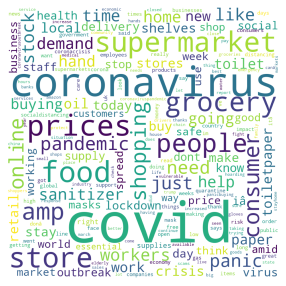

In [105]:
cv = CountVectorizer(min_df=10, max_df=0.7, stop_words='english')
df_cv = cv.fit_transform(df['OriginalTweet'])

word_count = df_cv.sum(axis = 0)
word_freq = [(word, word_count[0, idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wordcloud = WordCloud(background_color='white',
                      width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(5,5), dpi = 300)
plt.axis('off')
plt.imshow(wordcloud)
plt.show();

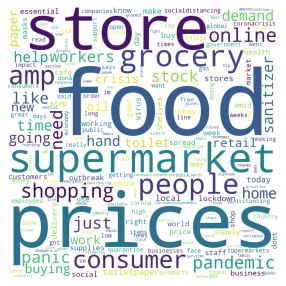

In [106]:
cv = CountVectorizer(min_df=10, max_df=0.3, stop_words='english')
df_cv = cv.fit_transform(df['OriginalTweet'])

word_count = df_cv.sum(axis = 0)
word_freq = [(word, word_count[0, idx]) for word, idx in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wordcloud = WordCloud(background_color='white',
                      width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))

plt.figure(figsize=(5,5), dpi = 300)
plt.axis('off')
plt.imshow(wordcloud)
plt.show();

We set min_df=10, max_df=0.3. If max_df is high, 'covid' will be the most obivous word in word cloud, since the tweets are all about covid-19.

## Word2vec with Clustering